In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

vd = veh = pd.read_csv("Tieliikenne Avoin Data 5.6.csv", sep=";", encoding="latin", dtype={"kayttoonottopvm" : "str"})

C:\Users\harju\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,18,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
cars = vd.loc[vd['ajoneuvoluokka'].isin(['M1', 'M1G'])]
data = cars.loc[:, ['kayttoonottopvm',  'merkkiSelvakielinen', 'matkamittarilukema']]
data.columns = ["date", "make", "mileage"]
data["date"] = pd.to_datetime(data["date"], format="%Y%m%d", errors="coerce")
data.dropna(inplace=True)

In [3]:
makeCounts = data["make"].value_counts()
top5makes = makeCounts[:5]

In [4]:
pivot = pd.pivot_table(data, values='mileage', index=['make'],columns=data["date"].dt.year, aggfunc=np.mean)
miles = pivot.loc[top5makes.index, 1980:]
miles

date,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Toyota,61507.600000,182770.000000,270750.821429,245851.038462,199175.000000,244806.300000,243726.500000,332273.461538,349208.952381,281419.178788,...,140234.134099,126128.917862,106978.891844,88074.687350,64780.883336,49878.584131,49450.393285,43772.495512,19799.435754,575.785714
Volkswagen,234108.750000,143405.444444,140394.000000,130759.666667,159785.700000,132311.600000,214996.000000,276145.590909,237621.227273,262581.324786,...,159744.014662,148785.393201,130972.230200,113677.525801,99533.619469,84336.013072,56965.747826,23445.972973,6453.600000,47.666667
Volvo,255146.461538,165010.894737,217953.000000,205062.333333,355033.250000,294212.000000,277600.400000,308668.163636,383235.666667,369757.641577,...,203856.414287,179403.186224,156794.898496,133994.566259,106460.282528,78850.961664,77191.878027,67059.946652,31312.384615,3177.379310
Ford,87757.928571,60712.066667,53046.470588,131336.400000,97402.923077,78940.666667,65932.761905,81684.526316,67185.900000,79835.037313,...,157081.444769,148637.108514,125160.499245,101874.456029,79398.724272,61977.502650,62137.467778,54777.152659,20353.620253,293.767857
Mercedes-Benz,281844.511628,264175.196429,262892.803030,277967.623529,303626.942029,322148.582677,368352.842105,361506.609428,365459.227468,395207.523743,...,204972.060658,183055.597740,167051.185458,138294.779018,113644.323835,83795.909757,77714.914369,64624.453941,22791.638889,555.793814


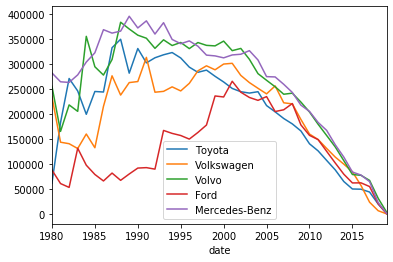

In [5]:
miles.T.plot()